In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import os
import csv
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator


In [2]:
df = pd.read_csv('C:\\Users\\Ivona\\Desktop\\MacedonianSignLanguage\\input\\data.csv')
X = df.image_path.values
y = df.target.values
(train_x, test_x, train_y, test_y) = (train_test_split(X, y, 
                                test_size=0.25, random_state=42))
print(f"Training on {len(train_x)} images")
print(f"Validationg on {len(test_x)} images")

Training on 9135 images
Validationg on 3045 images


In [3]:
tr_x = pd.DataFrame(train_x)

In [4]:
tr_y = pd.DataFrame(train_y)

In [5]:
images_train = []

for i in range(0,9135):
    file_path=tr_x.iloc[i][0]
    image = Image.open(file_path)
    image_data = np.array(image)
    images_train.append(image_data)

images_train = np.array(images_train)

In [6]:
te_x = pd.DataFrame(test_x)

In [7]:
te_y = pd.DataFrame(test_y)

In [8]:
images_test = []

for i in range(0,3045):
    file_path=te_x.iloc[i][0]
    image = Image.open(file_path)
    image_data = np.array(image)
    images_test.append(image_data)

images_test= np.array(images_test)

In [9]:
train_y_new = np_utils.to_categorical(train_y)
test_y_new= np_utils.to_categorical(test_y)

In [44]:
test = pd.read_csv("test.csv")

In [45]:
test_labels = test['target']

In [55]:
test_labels_new = np_utils.to_categorical(test_labels)

In [49]:
test_paths = test['image_path']

In [57]:
test_images = []

for i in range(0,58):
    file_path=test_paths.iloc[i]
    image = Image.open(file_path).resize((224,224))
    image_data = np.array(image)
    test_images.append(image_data)

test_images= np.array(test_images)

In [12]:
num_classes = test_y_new.shape[1]

In [13]:
labels = {
    0:"A",1:"Agol",2:"Amin",3:"B",4:"Beskonechnost",5:"C",6:"CH",7:"Centar",8:"Cvekje",9:"D",10:"DJ",
    11:"DZ",12:"Delenje",13:"Dopir",14:"E",15:"F",16:"Fizika",17:"G",18:"H",19:"I",20:"Jas",21:"Javanje",22:"K",
    23:"Kolache",24:"Korona",25:"Krst",26:"Kukja",27:"L",28:"LJ",29:"M",30:"Mnogu",31:"N",32:"NJ",33:"O",34:"P",
    35:"Peperutka",36:"Pritisok",37:"Prst",38:"R",39:"Rob",40:"S",41:"SH",42:"Sever",43:"Sida",44:"Sin",45:"Svekja",
    46:"T",47:"Telefon",48:"TojTaaToa",49:"U",50:"V",51:"Valkano",52:"Vilushka",53:"Z",54:"ZH",55:"Zamenki",56:"Zholtica",57:"Zoshto"
}

In [14]:
train_df = pd.concat([tr_x, tr_y], axis=1)
train_df.columns = ['path', 'target']

In [15]:
test_df = pd.concat([te_x, te_y], axis=1)
test_df.columns = ['path', 'target']

In [26]:
model1 = Sequential()
model1.add(Conv2D(64, (5, 5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

In [27]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 256)     

In [28]:
mc1 = ModelCheckpoint('model1.h5', monitor='loss', verbose=1, save_best_only=True)

In [29]:
history1=model1.fit(images_train, train_y_new, validation_data=(images_test, test_y_new),callbacks=[mc1],epochs=5)

Epoch 1/5
286/286 [==============================] - ETA: 0s - loss: 7.2193 - accuracy: 0.4441
Epoch 1: loss improved from inf to 7.21932, saving model to model1.h5
286/286 [==============================] - 851s 3s/step - loss: 7.2193 - accuracy: 0.4441 - val_loss: 0.6014 - val_accuracy: 0.8463
Epoch 2/5
286/286 [==============================] - ETA: 0s - loss: 0.3669 - accuracy: 0.9010
Epoch 2: loss improved from 7.21932 to 0.36688, saving model to model1.h5
286/286 [==============================] - 856s 3s/step - loss: 0.3669 - accuracy: 0.9010 - val_loss: 0.2669 - val_accuracy: 0.9278
Epoch 3/5
286/286 [==============================] - ETA: 0s - loss: 0.1814 - accuracy: 0.9538
Epoch 3: loss improved from 0.36688 to 0.18137, saving model to model1.h5
286/286 [==============================] - 826s 3s/step - loss: 0.1814 - accuracy: 0.9538 - val_loss: 0.2794 - val_accuracy: 0.9392
Epoch 4/5
286/286 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9793
Epoch 

In [30]:
model1_1 = load_model('model1.h5')

In [58]:
test_score1 = model1_1.evaluate(test_images,test_labels_new)
print("Test accuracy:",test_score1[1]*100)

2/2 [==============================] - 1s 539ms/step - loss: 6.0005 - accuracy: 0.7931
Test accuracy: 79.31034564971924


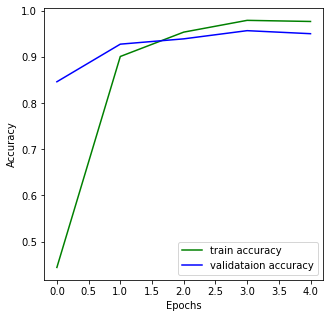

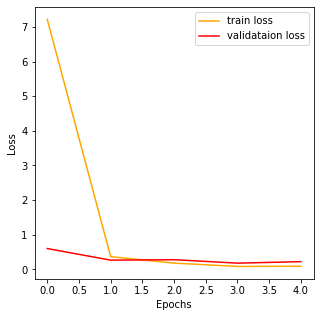

In [59]:
plt.figure(figsize=(5, 5))
plt.plot(history1.history['accuracy'], color='green', label='train accuracy')
plt.plot(history1.history['val_accuracy'], color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history1.history['loss'], color='orange', label='train loss')
plt.plot(history1.history['val_loss'], color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

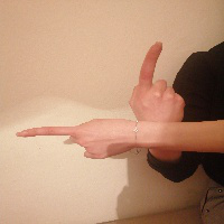

In [97]:
image1_1 = Image.open(test_paths[11]).resize((224,224))
image1_1

In [98]:
image1 = test_images[11]
image1 = image1.reshape(1,224,224,3)

In [99]:
prediction1 = model1_1.predict(image1)
print("Predict",np.argmax(prediction1))
print("Predicted class:",labels[np.argmax(prediction1)])

1/1 [==============================] - 0s 83ms/step
Predict 56
Predicted class: Zholtica


In [104]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(386, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

In [106]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 128)     

In [107]:
mc2 = ModelCheckpoint('model2.h5', monitor='loss', verbose=1, save_best_only=True)

In [108]:
history2=model2.fit(images_train, train_y_new, validation_data=(images_test, test_y_new),callbacks=[mc2],epochs=6)

Epoch 1/6
286/286 [==============================] - ETA: 0s - loss: 4.2411 - accuracy: 0.5284
Epoch 1: loss improved from inf to 4.24110, saving model to model2.h5
286/286 [==============================] - 247s 858ms/step - loss: 4.2411 - accuracy: 0.5284 - val_loss: 0.9936 - val_accuracy: 0.7478
Epoch 2/6
286/286 [==============================] - ETA: 0s - loss: 0.3116 - accuracy: 0.9180
Epoch 2: loss improved from 4.24110 to 0.31158, saving model to model2.h5
286/286 [==============================] - 246s 860ms/step - loss: 0.3116 - accuracy: 0.9180 - val_loss: 0.2404 - val_accuracy: 0.9402
Epoch 3/6
286/286 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9738
Epoch 3: loss improved from 0.31158 to 0.10795, saving model to model2.h5
286/286 [==============================] - 247s 862ms/step - loss: 0.1079 - accuracy: 0.9738 - val_loss: 0.1951 - val_accuracy: 0.9501
Epoch 4/6
286/286 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.97

In [109]:
model2_2 = load_model('model2.h5')

In [110]:
test_score2 = model2_2.evaluate(test_images,test_labels_new)
print("Test accuracy:",test_score2[1]*100)

2/2 [==============================] - 1s 180ms/step - loss: 5.6499 - accuracy: 0.8276
Test accuracy: 82.75862336158752


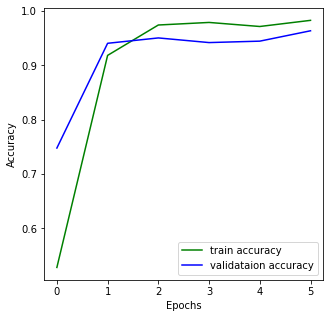

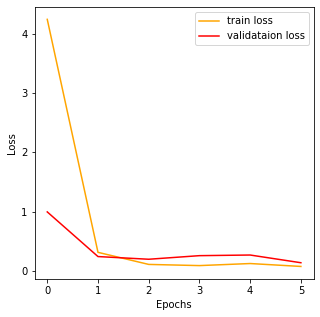

In [111]:
plt.figure(figsize=(5, 5))
plt.plot(history2.history['accuracy'], color='green', label='train accuracy')
plt.plot(history2.history['val_accuracy'], color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history2.history['loss'], color='orange', label='train loss')
plt.plot(history2.history['val_loss'], color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

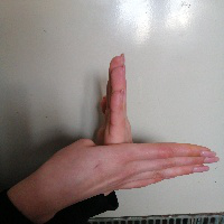

In [127]:
image2_2 = Image.open(test_paths[10]).resize((224,224))
image2_2

In [125]:
image2 = test_images[31]
image2 = image2.reshape(1,224,224,3)

In [126]:
prediction2 = model2_2.predict(image2)
print("Predict",np.argmax(prediction2))
print("Predicted class:",labels[np.argmax(prediction2)])

1/1 [==============================] - 0s 25ms/step
Predict 15
Predicted class: F


In [128]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

In [129]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 32)      12832     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 64)      

In [130]:
mc3 = ModelCheckpoint('model3.h5', monitor='loss', verbose=1, save_best_only=True)

In [131]:
history3=model3.fit(images_train, train_y_new, validation_data=(images_test, test_y_new),callbacks=[mc3],epochs=5)

Epoch 1/5
286/286 [==============================] - ETA: 0s - loss: 2.4101 - accuracy: 0.5587
Epoch 1: loss improved from inf to 2.41014, saving model to model3.h5
286/286 [==============================] - 96s 335ms/step - loss: 2.4101 - accuracy: 0.5587 - val_loss: 0.4003 - val_accuracy: 0.8824
Epoch 2/5
286/286 [==============================] - ETA: 0s - loss: 0.2622 - accuracy: 0.9264
Epoch 2: loss improved from 2.41014 to 0.26215, saving model to model3.h5
286/286 [==============================] - 94s 330ms/step - loss: 0.2622 - accuracy: 0.9264 - val_loss: 0.1503 - val_accuracy: 0.9626
Epoch 3/5
286/286 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9697
Epoch 3: loss improved from 0.26215 to 0.12082, saving model to model3.h5
286/286 [==============================] - 94s 329ms/step - loss: 0.1208 - accuracy: 0.9697 - val_loss: 0.1022 - val_accuracy: 0.9737
Epoch 4/5
286/286 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9836


In [132]:
model3_3 = load_model('model3.h5')

In [133]:
test_score3 = model3_3.evaluate(test_images,test_labels_new)
print("Test accuracy:",test_score3[1]*100)

2/2 [==============================] - 0s 81ms/step - loss: 4.8044 - accuracy: 0.7931
Test accuracy: 79.31034564971924


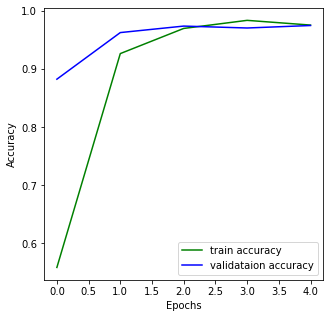

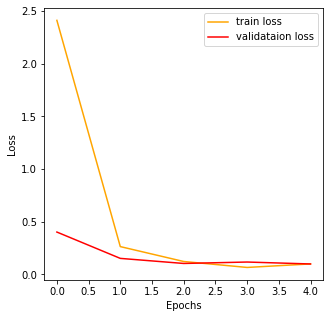

In [134]:
plt.figure(figsize=(5, 5))
plt.plot(history3.history['accuracy'], color='green', label='train accuracy')
plt.plot(history3.history['val_accuracy'], color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history3.history['loss'], color='orange', label='train loss')
plt.plot(history3.history['val_loss'], color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

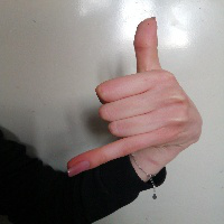

In [141]:
image3_3 = Image.open(test_paths[3]).resize((224,224))
image3_3

In [142]:
image3 = test_images[3]
image3 = image3.reshape(1,224,224,3)

In [143]:
prediction3 = model3_3.predict(image3)
print("Predict",np.argmax(prediction3))
print("Predicted class:",labels[np.argmax(prediction3)])

1/1 [==============================] - 0s 17ms/step
Predict 47
Predicted class: Telefon


In [180]:
model6 = Sequential()
model6.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D())
model6.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D())
model6.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model6.add(MaxPooling2D())
model6.add(Flatten())
model6.add(Dense(386, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(num_classes, activation='softmax'))

In [181]:
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 28, 28, 128)    

In [182]:
train_df['target'] = train_df['target'].apply(str)
test_df['target'] = test_df['target'].apply(str)

In [184]:
train_datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.03,
    zoom_range=0.03,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


Found 9135 validated image filenames belonging to 58 classes.
Found 3045 validated image filenames belonging to 58 classes.


In [185]:
mc6 = ModelCheckpoint('model6.h5', monitor='loss', verbose=1, save_best_only=True)

In [186]:
history6 = model6.fit_generator(
      train_generator,
      steps_per_epoch=143,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=48,
      verbose=2,callbacks=[mc6])

C:\Users\Ivona\AppData\Local\Temp/ipykernel_15156/2240838884.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history6 = model6.fit_generator(


Epoch 1/5

Epoch 1: loss improved from inf to 9.67644, saving model to model6.h5
143/143 - 325s - loss: 9.6764 - accuracy: 0.1696 - val_loss: 1.8418 - val_accuracy: 0.5143 - 325s/epoch - 2s/step
Epoch 2/5

Epoch 2: loss improved from 9.67644 to 1.42520, saving model to model6.h5
143/143 - 276s - loss: 1.4252 - accuracy: 0.6244 - val_loss: 0.6780 - val_accuracy: 0.8135 - 276s/epoch - 2s/step
Epoch 3/5

Epoch 3: loss improved from 1.42520 to 0.67785, saving model to model6.h5
143/143 - 272s - loss: 0.6778 - accuracy: 0.8082 - val_loss: 0.3420 - val_accuracy: 0.8933 - 272s/epoch - 2s/step
Epoch 4/5

Epoch 4: loss improved from 0.67785 to 0.42911, saving model to model6.h5
143/143 - 273s - loss: 0.4291 - accuracy: 0.8761 - val_loss: 0.3003 - val_accuracy: 0.9133 - 273s/epoch - 2s/step
Epoch 5/5

Epoch 5: loss improved from 0.42911 to 0.29806, saving model to model6.h5
143/143 - 271s - loss: 0.2981 - accuracy: 0.9140 - val_loss: 0.1745 - val_accuracy: 0.9465 - 271s/epoch - 2s/step


In [187]:
test['target'] = test['target'].apply(str)

In [188]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

Found 58 validated image filenames belonging to 58 classes.


In [189]:
test_score6= model6.evaluate_generator(test_generator)
print("Test accuracy:",test_score6[1])

C:\Users\Ivona\AppData\Local\Temp/ipykernel_15156/2633318144.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score6= model6.evaluate_generator(test_generator)


Test accuracy: 0.7758620977401733


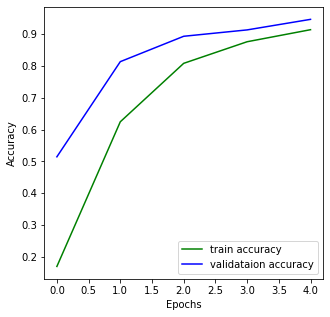

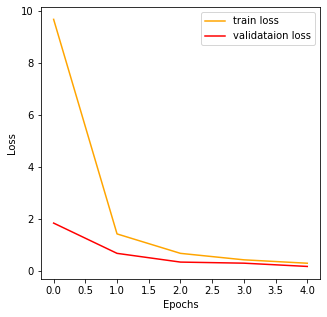

In [190]:
plt.figure(figsize=(5, 5))
plt.plot(history6.history['accuracy'], color='green', label='train accuracy')
plt.plot(history6.history['val_accuracy'], color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history6.history['loss'], color='orange', label='train loss')
plt.plot(history6.history['val_loss'], color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [191]:
model7 = Sequential()
model7.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D())
model7.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D())
model7.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model7.add(MaxPooling2D())
model7.add(Flatten())
model7.add(Dense(386, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(num_classes, activation='softmax'))

In [192]:
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 28, 28, 128)    

In [193]:
train_datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.03,
    zoom_range=0.03,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 9135 validated image filenames belonging to 58 classes.
Found 3045 validated image filenames belonging to 58 classes.


In [194]:
mc7 = ModelCheckpoint('model7.h5', monitor='loss', verbose=1, save_best_only=True)

In [195]:
history7 = model7.fit_generator(
      train_generator,
      steps_per_epoch=286,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=95,
      verbose=2,callbacks=[mc7])

C:\Users\Ivona\AppData\Local\Temp/ipykernel_15156/552198014.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history7 = model7.fit_generator(


Epoch 1/5

Epoch 1: loss improved from inf to 7.51229, saving model to model7.h5
286/286 - 285s - loss: 7.5123 - accuracy: 0.2878 - val_loss: 1.4167 - val_accuracy: 0.6151 - 285s/epoch - 995ms/step
Epoch 2/5

Epoch 2: loss improved from 7.51229 to 1.21490, saving model to model7.h5
286/286 - 282s - loss: 1.2149 - accuracy: 0.6582 - val_loss: 0.6243 - val_accuracy: 0.8227 - 282s/epoch - 988ms/step
Epoch 3/5

Epoch 3: loss improved from 1.21490 to 0.64642, saving model to model7.h5
286/286 - 279s - loss: 0.6464 - accuracy: 0.8104 - val_loss: 0.4213 - val_accuracy: 0.8704 - 279s/epoch - 975ms/step
Epoch 4/5

Epoch 4: loss improved from 0.64642 to 0.41565, saving model to model7.h5
286/286 - 293s - loss: 0.4157 - accuracy: 0.8760 - val_loss: 0.2438 - val_accuracy: 0.9263 - 293s/epoch - 1s/step
Epoch 5/5

Epoch 5: loss improved from 0.41565 to 0.31497, saving model to model7.h5
286/286 - 284s - loss: 0.3150 - accuracy: 0.9021 - val_loss: 0.2280 - val_accuracy: 0.9283 - 284s/epoch - 992ms/st

In [196]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 58 validated image filenames belonging to 58 classes.


In [198]:
test_score7= model7.evaluate_generator(test_generator)
print("Test accuracy:",test_score7[1])

C:\Users\Ivona\AppData\Local\Temp/ipykernel_15156/2930209670.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score7= model7.evaluate_generator(test_generator)


Test accuracy: 0.7413793206214905


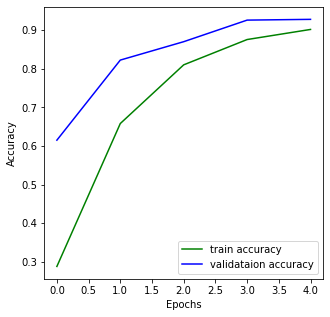

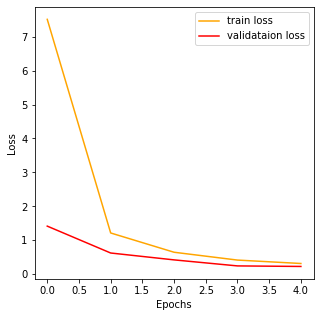

In [199]:
plt.figure(figsize=(5, 5))
plt.plot(history7.history['accuracy'], color='green', label='train accuracy')
plt.plot(history7.history['val_accuracy'], color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history7.history['loss'], color='orange', label='train loss')
plt.plot(history7.history['val_loss'], color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [200]:
model8 = Sequential()
model8.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model8.add(MaxPooling2D())
model8.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model8.add(MaxPooling2D())
model8.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model8.add(MaxPooling2D())
model8.add(Flatten())
model8.add(Dense(386, activation='relu'))
model8.add(Dense(256, activation='relu'))
model8.add(Dense(128, activation='relu'))
model8.add(Dense(64, activation='relu'))
model8.add(Dense(num_classes, activation='softmax'))

In [201]:
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 28, 28, 128)    

In [202]:
train_datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.03,
    zoom_range=0.03,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 9135 validated image filenames belonging to 58 classes.
Found 3045 validated image filenames belonging to 58 classes.


In [203]:
mc8 = ModelCheckpoint('model8.h5', monitor='loss', verbose=1, save_best_only=True)

In [204]:
history8 = model8.fit_generator(
      train_generator,
      steps_per_epoch=143,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=48,
      verbose=2,callbacks=[mc8])

C:\Users\Ivona\AppData\Local\Temp/ipykernel_15156/2002985249.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history8 = model8.fit_generator(


Epoch 1/10

Epoch 1: loss improved from inf to 8.64159, saving model to model8.h5
143/143 - 291s - loss: 8.6416 - accuracy: 0.1628 - val_loss: 2.0867 - val_accuracy: 0.4752 - 291s/epoch - 2s/step
Epoch 2/10

Epoch 2: loss improved from 8.64159 to 1.62010, saving model to model8.h5
143/143 - 283s - loss: 1.6201 - accuracy: 0.5690 - val_loss: 0.9775 - val_accuracy: 0.7192 - 283s/epoch - 2s/step
Epoch 3/10

Epoch 3: loss improved from 1.62010 to 0.91861, saving model to model8.h5
143/143 - 282s - loss: 0.9186 - accuracy: 0.7389 - val_loss: 0.5640 - val_accuracy: 0.8417 - 282s/epoch - 2s/step
Epoch 4/10

Epoch 4: loss improved from 0.91861 to 0.59370, saving model to model8.h5
143/143 - 282s - loss: 0.5937 - accuracy: 0.8286 - val_loss: 0.3420 - val_accuracy: 0.9028 - 282s/epoch - 2s/step
Epoch 5/10

Epoch 5: loss improved from 0.59370 to 0.40774, saving model to model8.h5
143/143 - 274s - loss: 0.4077 - accuracy: 0.8814 - val_loss: 0.3284 - val_accuracy: 0.9057 - 274s/epoch - 2s/step
Epoc

In [206]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='target',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

Found 58 validated image filenames belonging to 58 classes.


In [207]:
test_score8= model8.evaluate_generator(test_generator)
print("Test accuracy:",test_score8[1])

C:\Users\Ivona\AppData\Local\Temp/ipykernel_15156/1460076192.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score8= model8.evaluate_generator(test_generator)


Test accuracy: 0.7931034564971924


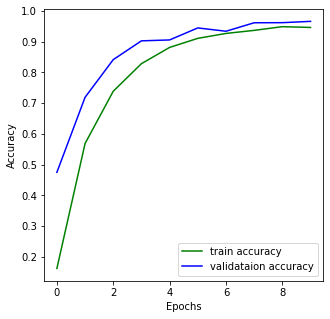

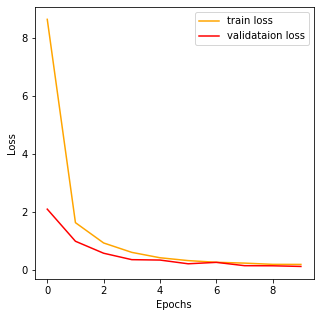

In [208]:
plt.figure(figsize=(5, 5))
plt.plot(history8.history['accuracy'], color='green', label='train accuracy')
plt.plot(history8.history['val_accuracy'], color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history8.history['loss'], color='orange', label='train loss')
plt.plot(history8.history['val_loss'], color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()